<a href="https://colab.research.google.com/github/IshaSarangi/Edureka_Notes/blob/main/Edureka_Building_Simple_AutoEncoder_in_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1duxi5g4OSD4UsI82lsmlOhRQLXVt7W_p?usp=sharing

##Building a Simple Autoencoder in Keras

###Step 1: Install Required Libraries

In [1]:
#Install Tensorflow which includes Keras for building neural networks
#We will use this to create an autoencoder that compresses and reconstructs images
!pip install -q tensorflow matplotlib numpy

###Step 2: Import Libraries

In [2]:
#Import Tensorflow/Keras for model building and matplotlib for visualization
#NumPy handles numerical operations on image data
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

print("Libraries imported successfully!")
print(f"Tensorflow Version: {tf.__version__}")

Libraries imported successfully!
Tensorflow Version: 2.19.0


###Step 3: Load and Preprocess MNIST Data

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0

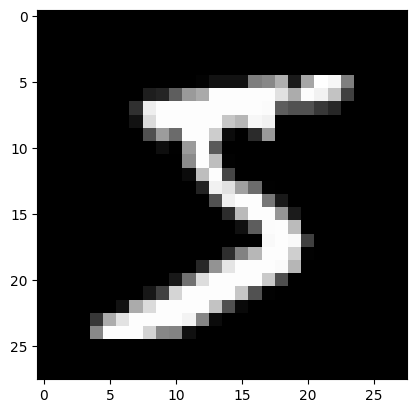

MNIST data loaded and preprocessed
Training Samples: 60000, Test Samples: 10000
Input Dimension: 784 (28x28 flattened)


In [3]:
#Load the MNIST dataset of handwritten digits (28x28 pixel images)
#Normalize pixel values to 0-1 range for better training performance
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

#Print sample array
print(x_train[0])

#Display image
plt.imshow(x_train[0], cmap='gray')
plt.show()

#Normalize pixel values to range [0,1]
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#Reshape data to flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape((len(x_train), 28*28))
x_test = x_test.reshape((len(x_test), 28*28))

print("MNIST data loaded and preprocessed")
print(f"Training Samples: {x_train.shape[0]}, Test Samples: {x_test.shape[0]}")
print(f"Input Dimension: {x_train.shape[1]} (28x28 flattened)")

###Step 4: Build the Autoencoder Model

In [4]:
#An autoencoder has two parts: encoder (compresses) and decoder (reconstructs)
#The bottleneck layer (encoding_dim) forces the model to learn compressed representations

#Define the compression dimension (bottleneck layer)
encoding_dim = 32 #Compress 784 dimensions to 32

#Build the autoencoder architecture
autoencoder = keras.Sequential([
    #Encoder: compress 784 -> 128 -> 64 -> 32
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(encoding_dim, activation='relu'),

    #Decoder: reconstruct 32 -> 64 -> 128 -> 784
    layers.Dense(64, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(784, activation='sigmoid') #Sigmoid to output values in [0,1]
])

#Compile the model
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Autoencoder model built successfully!")
print(f"Compression ratio: {784}/{encoding_dim} = {784/encoding_dim: .1f}x")
autoencoder.summary()

Autoencoder model built successfully!
Compression ratio: 784/32 =  24.5x


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

###Step 5: Train the Autoencoder

In [5]:
#Train the model to reconstruct input images (input=output)
#The model learns to compress and decompress images through the bottleneck
print("Training autoencoder...")
history = autoencoder.fit(
    x_train, x_train, #input and target are the same (reconstruction)
    epochs = 10,
    batch_size = 256,
    validation_data = (x_test, x_test),
    verbose = 1
)

print("Training completed!")

Training autoencoder...
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.0976 - mae: 0.2007 - val_loss: 0.0378 - val_mae: 0.0878
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0339 - mae: 0.0809 - val_loss: 0.0257 - val_mae: 0.0656
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0249 - mae: 0.0641 - val_loss: 0.0214 - val_mae: 0.0569
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0212 - mae: 0.0568 - val_loss: 0.0194 - val_mae: 0.0526
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0191 - mae: 0.0527 - val_loss: 0.0173 - val_mae: 0.0494
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0175 - mae: 0.0497 - val_loss: 0.0162 - val_mae: 0.0466
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0162 - mae: 0.0469 - val_loss: 0.0152 - val_mae: 0.0443
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0152 - mae: 0.0447 - val_loss: 0.0141 - val_mae: 0.0423
Epoch 9/10
235/235 ━━━━

###Step 6: Test Reconstruction Quality

In [6]:
#Use the trained autoencoder to reconstruct test images
#Compare original vs reconstructed to evaluate compression quality
reconstructed = autoencoder.predict(x_test[:10])

#Reshape back to 28x28 for visualisation
original_images = x_test[:10].reshape(10, 28, 28)
reconstructed_images = reconstructed.reshape(10, 28, 28)

print("Generated reconstructions for visualization")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Generated reconstructions for visualization


###Step 7: Visualize Results

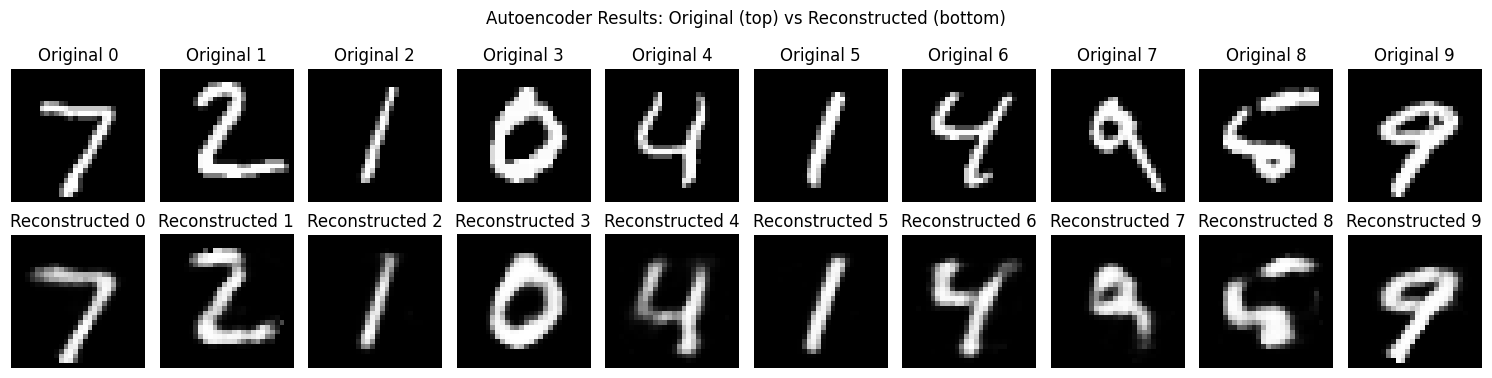


Demo completed!
Average reconstruction error (MSE):  0.0119
Compression achieved: 784 -> 32 -> 784 dimensions


In [7]:
#Display original and reconstructed images side by side
#This shows how well the autoencoder learned to compress and reconstruct

fig, axes = plt.subplots(2, 10, figsize=(15, 4))
fig.suptitle("Autoencoder Results: Original (top) vs Reconstructed (bottom)")

for i in range(10):
    #Original Images
    axes[0, i].imshow(original_images[i], cmap='gray')
    axes[0, i].set_title(f"Original {i}")
    axes[0, i].axis("off")

    #Reconstructed Images
    axes[1, i].imshow(reconstructed_images[i], cmap='gray')
    axes[1, i].set_title(f"Reconstructed {i}")
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

#Calculate and display reconstruction error
mse = np.mean((x_test[:10] - reconstructed)**2)
print("\nDemo completed!")
print(f"Average reconstruction error (MSE): {mse: .4f}")
print(f"Compression achieved: {784} -> {encoding_dim} -> {784} dimensions")